<a href="https://colab.research.google.com/github/KS-Aarya/Trader-Performance-Analysis-by-Market-Sentiment/blob/main/Trader_Performance_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Google Drive

In [ ]:
#Mounding Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries

In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading datasets

In [ ]:
# Update the path to your dataset folder in Drive
history_data = pd.read_csv("/content/drive/MyDrive/Dataset/historical_data.csv")
senti_data = pd.read_csv("/content/drive/MyDrive/Dataset/fear_greed_index.csv")


Exploring datasets

In [ ]:
# First few rows
history_data.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
senti_data.head()

,timestamp,value,classification,date,sentiment_date,Sentiment_Num
0,1517463000,30,Fear,2018-02-01,2018-02-01,0.0
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02,0.0
2,1517635800,40,Fear,2018-02-03,2018-02-03,0.0
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04,0.0
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05,0.0



Checking structure

In [ ]:
history_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


Missing values

In [ ]:
print("Missing Values in Historical Data")
print(history_data.isnull().sum())
print("\nMisssing Values in Sentiment Data")
print(senti_data.isnull().sum())

Missing Values in Historical Data
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Misssing Values in Sentiment Data
timestamp         0
value             0
classification    0
date              0
dtype: int64


Clean and convert date columns

In [ ]:
# Convertinng 'Timestamp IST' to proper datetime
history_data['Timestamp'] = pd.to_datetime(history_data['Timestamp IST'], format="%d-%m-%Y %H:%M")


In [ ]:
# Creating date-only column for merging
history_data['trade_date'] = history_data['Timestamp'].dt.date


In [ ]:
# Checking first 5 rows
history_data[['Timestamp','trade_date']].head()

,Timestamp,trade_date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


Fixing sentiment data date and create sentiment_date

In [ ]:
# Converting sentiment 'date' column to datetime
senti_data['date'] = pd.to_datetime(senti_data['date'])

In [ ]:

# Creating date-only column for merging
senti_data['sentiment_date'] = senti_data['date'].dt.date


In [ ]:
# Checking first 5 rows
senti_data[['date','sentiment_date']].head()

,date,sentiment_date
0,2018-02-01,2018-02-01
1,2018-02-02,2018-02-02
2,2018-02-03,2018-02-03
3,2018-02-04,2018-02-04
4,2018-02-05,2018-02-05


Mapping sentiment classification to numeric values

In [ ]:
# Maping sentiment to numeric
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 0,
    'Neutral': 0.5,
    'Greed': 1,
    'Extreme Greed': 1
}

senti_data['Sentiment_Num'] = senti_data['classification'].map(sentiment_map)

# Checking last 5 rows
senti_data[['classification','Sentiment_Num']].tail()


,classification,Sentiment_Num
2639,Neutral,0.5
2640,Greed,1.0
2641,Greed,1.0
2642,Neutral,0.5
2643,Greed,1.0


Merging trader data with sentiment data

In [ ]:
merged_data = history_data.merge(
    senti_data[['sentiment_date','Sentiment_Num','classification']],
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)

# Checking merged data
merged_data[['Account','Coin','Closed PnL','trade_date','classification','Sentiment_Num']].head()


,Account,Coin,Closed PnL,trade_date,classification,Sentiment_Num
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02,Extreme Greed,1.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02,Extreme Greed,1.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02,Extreme Greed,1.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02,Extreme Greed,1.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-12-02,Extreme Greed,1.0


Checking for missing sentiment after merge

In [ ]:
# Counting missing classifications
missing_sentiment = merged_data['classification'].isnull().sum()
print("Number of trades with missing sentiment:", missing_sentiment)


Number of trades with missing sentiment: 6


Handling the missing sentiment trades

In [ ]:
#Droping missing sentiment trades
cleaned_data = merged_data.dropna(subset=['classification'])


Exploratory Data Analysis (EDA) – PnL by sentiment

In [ ]:
pnl_by_sentiment = cleaned_data.groupby('classification')['Closed PnL'].describe()
print("PnL Distribution by Market Sentiment:\n")
pnl_by_sentiment

PnL Distribution by Market Sentiment:



,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,21400.0,34.537862,1136.056091,-31036.69194,0.0,0.0,5.635032,115287.00000
Extreme Greed,39992.0,67.892861,766.828294,-10259.46800,0.0,0.0,10.028709,44223.45187
Fear,61837.0,54.290400,935.355438,-35681.74723,0.0,0.0,5.590856,135329.09010
Greed,50303.0,42.743559,1116.028390,-117990.10410,0.0,0.0,4.944105,74530.52371
Neutral,37686.0,34.307718,517.122220,-24500.00000,0.0,0.0,3.995795,48504.09555


Visualization of PnL by sentiment

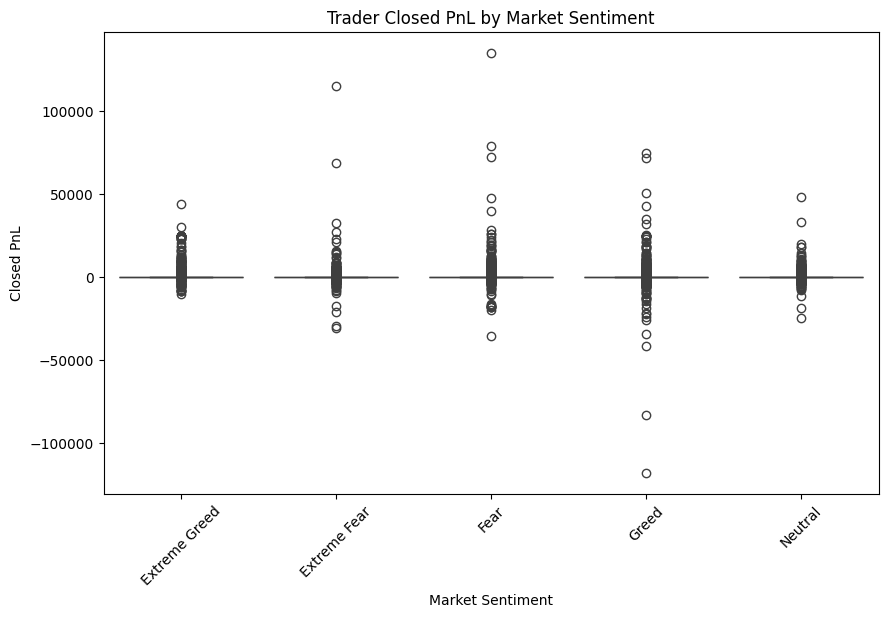

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_data)
plt.title('Trader Closed PnL by Market Sentiment')
plt.ylabel('Closed PnL')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=45)
plt.show()


Most trades cluster near zero PnL in all sentiment phases.

Extreme Fear/Greed show higher volatility with very large wins and losses.

Neutral sentiment has fewer extreme outcomes.

Visualizing PnL Distributions by Sentiment (Density/Histogram)

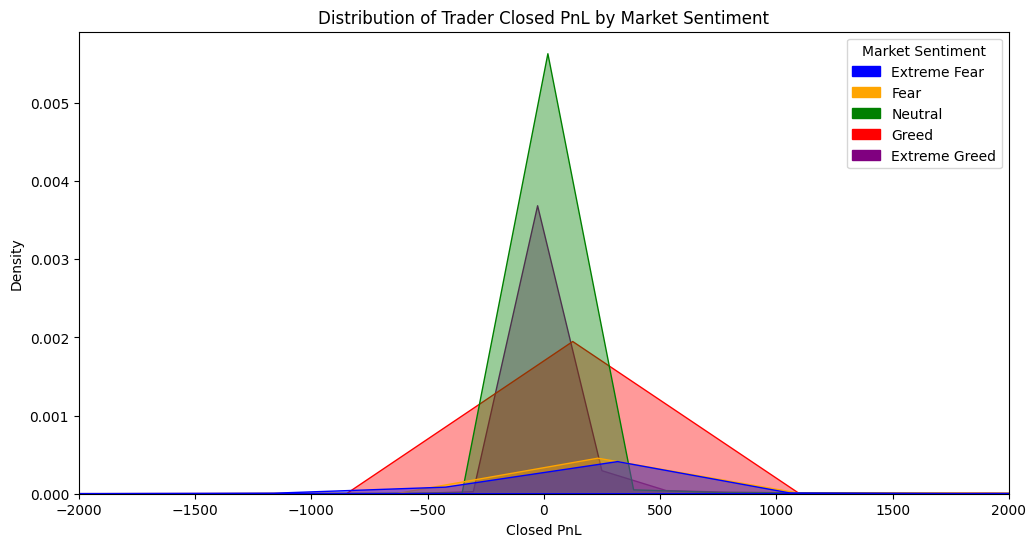

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12,6))

# Defining fixed colors for each sentiment
palette = {
    'Extreme Fear': 'blue',
    'Fear': 'orange',
    'Neutral': 'green',
    'Greed': 'red',
    'Extreme Greed': 'purple'
}

# Defining order to keep legend consistent
hue_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

# Ploting with fixed palette and order
sns.kdeplot(
    data=cleaned_data,
    x='Closed PnL',
    hue='classification',
    hue_order=hue_order,
    fill=True,
    common_norm=False,
    alpha=0.4,
    palette=palette
)

plt.xlim(-2000, 2000)
plt.title('Distribution of Trader Closed PnL by Market Sentiment')
plt.xlabel('Closed PnL')
plt.ylabel('Density')

# Force legend patches to exactly match palette
handles = [mpatches.Patch(color=palette[label], label=label) for label in hue_order]
plt.legend(handles=handles, title='Market Sentiment')

plt.show()


Statistical Summary

In [ ]:
summary_stats = cleaned_data.groupby("classification")["Closed PnL"].agg(
    Mean="mean",
    Median="median",
    Std_Dev="std",
    Min="min",
    Max="max"
).reset_index()

summary_stats


,classification,Mean,Median,Std_Dev,Min,Max
0,Extreme Fear,34.537862,0.0,1136.056091,-31036.69194,115287.00000
1,Extreme Greed,67.892861,0.0,766.828294,-10259.46800,44223.45187
2,Fear,54.290400,0.0,935.355438,-35681.74723,135329.09010
3,Greed,42.743559,0.0,1116.028390,-117990.10410,74530.52371
4,Neutral,34.307718,0.0,517.122220,-24500.00000,48504.09555


Risk/Reward Analysis

In [ ]:
import numpy as np

risk_reward = cleaned_data.groupby("classification")["Closed PnL"].apply(
    lambda x: np.mean(x[x > 0]) / abs(np.mean(x[x < 0])) if len(x[x < 0]) > 0 else np.nan
).reset_index(name="RiskRewardRatio")

risk_reward


,classification,RiskRewardRatio
0,Extreme Fear,0.674543
1,Extreme Greed,1.339167
2,Fear,0.969224
3,Greed,0.910942
4,Neutral,0.923695


* Extreme Greed is the most favorable condition for traders (highest payoff per risk).

* Extreme Fear is the worst condition, with losses dominating.

* Neutral, Fear, and Greed are close to 1.0, meaning trades break even on average.

* The market extremes (Fear vs Greed) show opposite outcomes — fear leads to heavy losses, greed to better rewards.

         .

Win Rate by Sentiment (%)

  Market Sentiment  Win Rate (%)
0     Extreme Fear     37.060748
1    Extreme Greed     46.494299
2             Fear     42.076750
3            Greed     38.482794
4          Neutral     39.699093


/tmp/ipython-input-331971179.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Market Sentiment', y='Win Rate (%)', data=win_rate, palette='viridis')


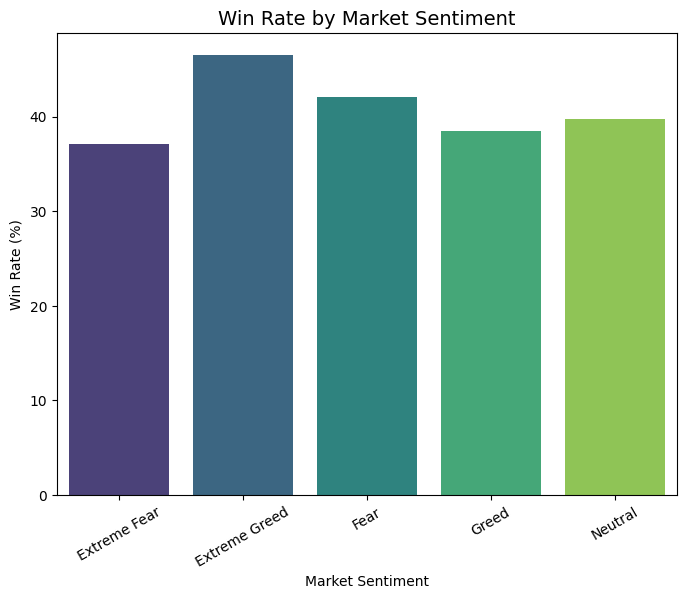

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating win rate for each sentiment
win_rate = merged_data.groupby('classification')['Closed PnL'].apply(lambda x: (x > 0).mean() * 100).reset_index()
win_rate.columns = ['Market Sentiment', 'Win Rate (%)']

print(win_rate)

# Ploting win rate by sentiment
plt.figure(figsize=(8,6))
sns.barplot(x='Market Sentiment', y='Win Rate (%)', data=win_rate, palette='viridis')

plt.title("Win Rate by Market Sentiment", fontsize=14)
plt.ylabel("Win Rate (%)")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=30)
plt.show()


* Highest win rate in Extreme Greed (~46%).
* Lowest win rate in Extreme Fear (~37%).


Comparing Win Rate vs Risk-Reward

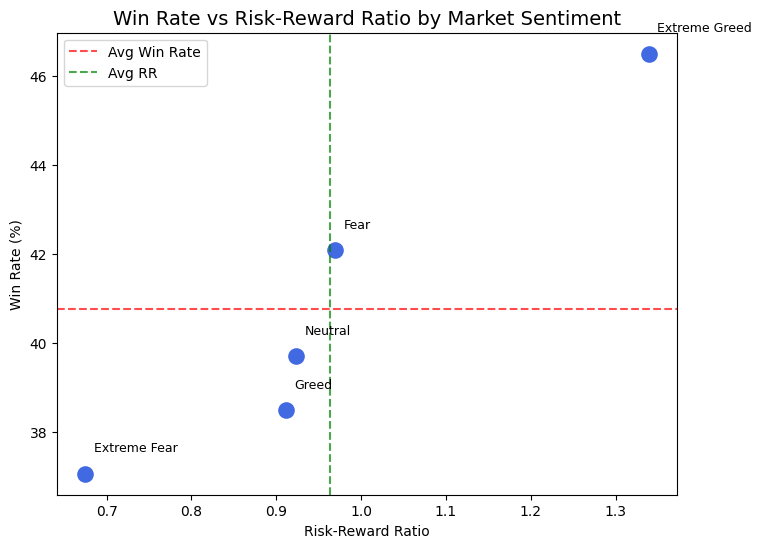

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create Risk-Reward data
rr_data = pd.DataFrame({
    'classification': ['Extreme Fear', 'Extreme Greed', 'Fear', 'Greed', 'Neutral'],
    'RiskRewardRatio': [0.674543, 1.339167, 0.969224, 0.910942, 0.923695]
})

# Your Win Rate data
win_rate = pd.DataFrame({
    'Market Sentiment': ['Extreme Fear', 'Extreme Greed', 'Fear', 'Greed', 'Neutral'],
    'Win Rate (%)': [37.060748, 46.494299, 42.076750, 38.482794, 39.699093]
})

# Merge Win Rate and Risk-Reward
comparison = pd.merge(win_rate, rr_data, left_on="Market Sentiment", right_on="classification")
comparison = comparison[['Market Sentiment', 'Win Rate (%)', 'RiskRewardRatio']]

# Plot scatter
plt.figure(figsize=(8,6))
plt.scatter(comparison['RiskRewardRatio'], comparison['Win Rate (%)'], s=120, color='royalblue')

# Add labels for each sentiment
for i, row in comparison.iterrows():
    plt.text(row['RiskRewardRatio']+0.01, row['Win Rate (%)']+0.5, row['Market Sentiment'], fontsize=9)

# Add average lines
plt.axhline(comparison['Win Rate (%)'].mean(), color='red', linestyle='--', alpha=0.7, label='Avg Win Rate')
plt.axvline(comparison['RiskRewardRatio'].mean(), color='green', linestyle='--', alpha=0.7, label='Avg RR')

plt.title("Win Rate vs Risk-Reward Ratio by Market Sentiment", fontsize=14)
plt.xlabel("Risk-Reward Ratio")
plt.ylabel("Win Rate (%)")
plt.legend()
plt.show()


* Extreme Greed → Best performance (high win rate + high risk-reward).

* Fear → Wins often, but profit per trade is small (risk-reward ~1).

* Neutral & Greed → Average performers, below both benchmarks.

* Extreme Fear → Worst performance (low win rate + low risk-reward).


The top-right zone (e.g., Extreme Greed) signals the best performance with frequent wins and high rewards, while the bottom-left zone (e.g., Extreme Fear) shows the worst with fewer wins and poor payoff.